PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING
1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng 
đầu tiên. 
2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat 
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked 
3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi 
tách cột xong thì xóa luôn cột Name 
4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F 
5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa 
ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng 
vé (hạng hành khách: Pclass). 
Ta tiến hành làm các bước sau:
- Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân 
    phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm 
    hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu. 
- Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực 
quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.
6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa 
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult 
và ( age > 60): Older 
7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách  Mr, 
Mrs, Miss, Master ra khỏi “secondName” 
8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối 
với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch 
9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách 
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0. 
10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính 
cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu 
thì thay thế bằng “Unknown” 
11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện  
(train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện. 

In [10]:
# Câu 1: Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên. 

import pandas as pd

def load_data(filename):
    return pd.read_csv(filename)

filename = "titanic_disaster.csv"
titanic = load_data(filename)
print(titanic.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64
PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
dtype: int64
PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       0
dtype: int64
Axes(0.125,0.11;0.62x0.77)


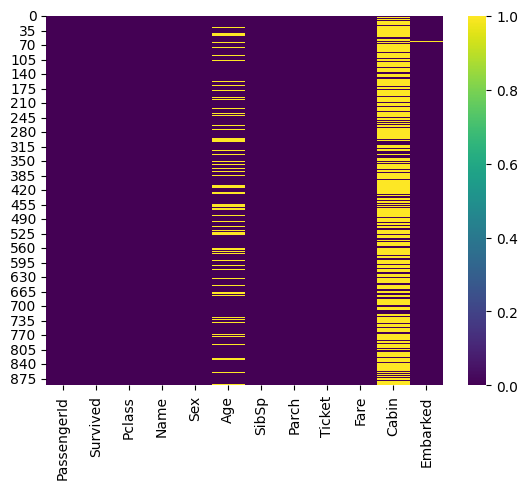

In [12]:
# Câu 2: Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). 
# Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked.

dfage = titanic[titanic['Age'].isna()]
print(dfage.count())

dfcabin = titanic[titanic['Cabin'].isna()]
print(dfcabin.count())

dfembarked = titanic[titanic['Embarked'].isna()]
print(dfembarked.count())

# Trực quan hóa bằng heatmap
import seaborn as sns
print(sns.heatmap(titanic.isna(), cmap='viridis'))

In [13]:
# Câu 3: Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi 
# tách cột xong thì xóa luôn cột Name 

titanic[['firstName', 'secondName']] = titanic['Name'].str.split(',', expand=True)
titanic_splitname = titanic.drop("Name", axis=1)
titanic_splitname.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [14]:
# Câu 4: Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F.

def substitute_Sex(x_df):
    mapping = {'male' : 'M', 'female' : 'F'}
    x_df['Sex'] = x_df['Sex'].map(mapping)
    return x_df

titanic5 = titanic_splitname.pipe(substitute_Sex)
print(titanic5.head(5))

   PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3   M  22.0      1      0         A/5 21171   
1            2         1       1   F  38.0      1      0          PC 17599   
2            3         1       3   F  26.0      0      0  STON/O2. 3101282   
3            4         1       1   F  35.0      1      0            113803   
4            5         0       3   M  35.0      0      0            373450   

      Fare Cabin Embarked  firstName  \
0   7.2500   NaN        S     Braund   
1  71.2833   C85        C    Cumings   
2   7.9250   NaN        S  Heikkinen   
3  53.1000  C123        S   Futrelle   
4   8.0500   NaN        S      Allen   

                                    secondName  
0                              Mr. Owen Harris  
1   Mrs. John Bradley (Florence Briggs Thayer)  
2                                  Miss. Laina  
3           Mrs. Jacques Heath (Lily May Peel)  
4                            Mr. William Henr

C:\Users\Tran Thinh\AppData\Local\Temp\ipykernel_29500\3849286806.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic5["Age"][titanic5["Pclass"] == 1] = titanic5["Age"][titanic5["Pclass"] == 1].fillna(titanic5["Age"][titanic5["Pclas

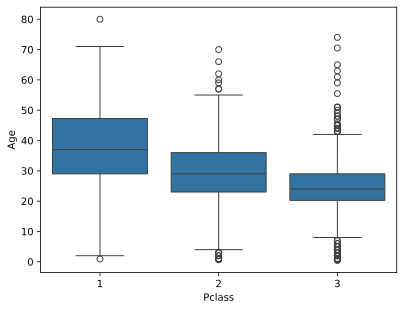

In [ ]:
# Câu 5: Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa 
# ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng 
# vé (hạng hành khách: Pclass).
    # a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân 
    # phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm 
    # hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu. 

import seaborn as sns

sns.boxplot(x='Pclass', y='Age', data=titanic5)

In [24]:
    # b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực 
    # quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map. 

titanic5["Age"][titanic5["Pclass"] == 1] = titanic5["Age"][titanic5["Pclass"] == 1].fillna(titanic5["Age"][titanic5["Pclass"] == 1].median(), inplace = False)
titanic5["Age"][titanic5["Pclass"] == 2] = titanic5["Age"][titanic5["Pclass"] == 2].fillna(titanic5["Age"][titanic5["Pclass"] == 2].median(), inplace = False)
titanic5["Age"][titanic5["Pclass"] == 3] = titanic5["Age"][titanic5["Pclass"] == 3].fillna(titanic5["Age"][titanic5["Pclass"] == 3].median(), inplace = False)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(titanic5.isna(), yticklabels = False, cbar = True, cmap='viridis')

C:\Users\Tran Thinh\AppData\Local\Temp\ipykernel_29500\1658510102.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic5["Age"][titanic5["Pclass"] == 1] = titanic5["Age"][titanic5["Pclass"] == 1].fillna(titanic5["Age"][titanic5["Pclass

<Axes: >